<a href="https://colab.research.google.com/github/samrawitsissay/machine-learning-prodigy/blob/main/MLTask03/catsAndDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!mv "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle (1).json to kaggle (1).json


In [ ]:
!kaggle datasets list -s cats


ref                                                        title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
shaunthesheep/microsoft-catsvsdogs-dataset                 Cats-vs-Dogs                                         825979578  2020-03-12 05:34:30.730000          82510        786  0.875            
marquis03/cats-and-dogs                                    Cats and Dogs                                         10219362  2023-10-27 10:48:19.220000          10479         93  1.0              
chetankv/dogs-cats-images                                  Dogs & Cats Images                                   455718914  2018-04-19 18:20:08.593000          47579        609  0.5625           
waqi786/cats-dataset     

In [6]:
# Make sure kaggle.json is in ~/.kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Create a folder for data
!mkdir -p /content/data

# Download the dataset
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset -p /content/data

# Unzip
!unzip -q /content/data/microsoft-catsvsdogs-dataset.zip -d /content/data/

mv: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
microsoft-catsvsdogs-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace /content/data/MSR-LA - 3467.docx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/data/PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/data/PetImages/Cat/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/data/PetImages/Cat/10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/data/PetImages/Cat/100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/data/PetImages/Cat/1000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/data/PetImages/Cat/10000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/data/PetImages/Cat/10001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/data/PetImages/Cat/10002.jp

In [7]:
!unzip -o /content/data/microsoft-catsvsdogs-dataset.zip -d /content/data/


Streaming output truncated to the last 5000 lines.
  inflating: /content/data/PetImages/Dog/550.jpg  
  inflating: /content/data/PetImages/Dog/5500.jpg  
  inflating: /content/data/PetImages/Dog/5501.jpg  
  inflating: /content/data/PetImages/Dog/5502.jpg  
  inflating: /content/data/PetImages/Dog/5503.jpg  
  inflating: /content/data/PetImages/Dog/5504.jpg  
  inflating: /content/data/PetImages/Dog/5505.jpg  
  inflating: /content/data/PetImages/Dog/5506.jpg  
  inflating: /content/data/PetImages/Dog/5507.jpg  
  inflating: /content/data/PetImages/Dog/5508.jpg  
  inflating: /content/data/PetImages/Dog/5509.jpg  
  inflating: /content/data/PetImages/Dog/551.jpg  
  inflating: /content/data/PetImages/Dog/5510.jpg  
  inflating: /content/data/PetImages/Dog/5511.jpg  
  inflating: /content/data/PetImages/Dog/5512.jpg  
  inflating: /content/data/PetImages/Dog/5513.jpg  
  inflating: /content/data/PetImages/Dog/5514.jpg  
  inflating: /content/data/PetImages/Dog/5515.jpg  
  inflating: /c

In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
# Path to dataset
data_dir = '/content/data/PetImages'
categories = ['Cat', 'Dog']

# Parameters
IMG_SIZE = 64  # resize images to 64x64 for faster training

# Prepare data
X = []
y = []

for label, category in enumerate(categories):
    folder = os.path.join(data_dir, category)
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(file_path)
            if img is None:
                continue
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale
            X.append(img.flatten())  # flatten to 1D vector
            y.append(label)
        except Exception as e:
            pass  # skip any corrupted images


In [10]:
# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data prepared:")
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

Data prepared:
X_train shape: (19997, 4096)
X_test shape : (5000, 4096)
y_train shape: (19997,)
y_test shape : (5000,)


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize SVM
svm_clf = SVC(kernel='linear', C=1.0)

# Use only the first 2000 samples for training (much faster)
X_train_small = X_train[:2000]
y_train_small = y_train[:2000]

# Train on the smaller set
svm_clf.fit(X_train_small, y_train_small)

# Evaluate on the full test set
y_pred = svm_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5124
              precision    recall  f1-score   support

           0       0.51      0.60      0.55      2500
           1       0.52      0.42      0.46      2500

    accuracy                           0.51      5000
   macro avg       0.51      0.51      0.51      5000
weighted avg       0.51      0.51      0.51      5000



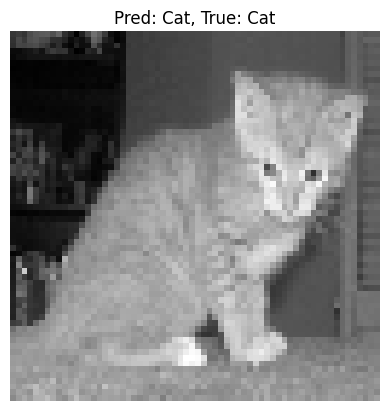

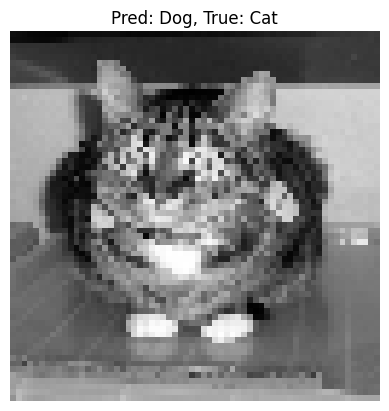

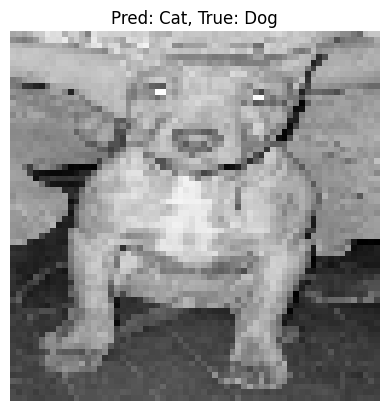

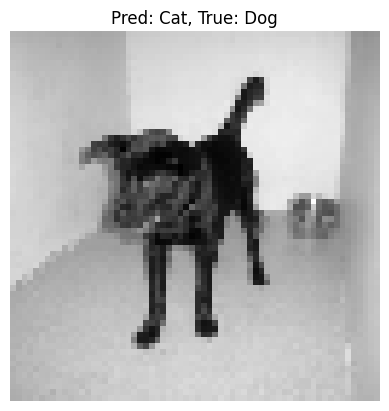

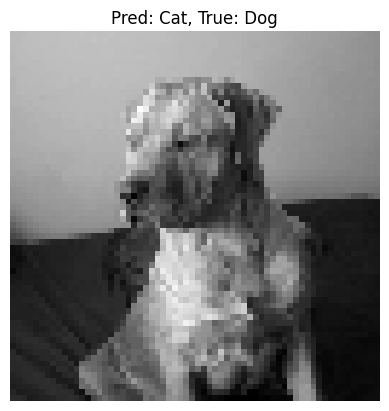

In [12]:
import matplotlib.pyplot as plt
import random

# Show 5 random test images with predictions
for i in range(5):
    idx = random.randint(0, len(X_test)-1)
    img = X_test[idx].reshape(64,64)  # reshape back
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {'Dog' if y_pred[idx]==1 else 'Cat'}, True: {'Dog' if y_test[idx]==1 else 'Cat'}")
    plt.axis('off')
    plt.show()
